In [3]:
import pandas as pd 
# default='warn', Used here to supress warning when slicing and creating high earners column
pd.options.mode.chained_assignment = None 


In [4]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
# custom function from Web_scrapper_League_Tables notebook 
from ipynb.fs.full.Web_scrapper_League_Tables import League_table_scraper


#### Getting data from the API

In [6]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/it/serie-b/2019-2020/'

# Retrieve json
json = requests.get(endpoint, headers=headers).text

#Data for 2019/2020
df1 = pd.read_json(json)

df1 = df1[df1["season_term"] == "combined"].reset_index(drop = True)

In [7]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/it/serie-b/2020-2021/'

# Retrieve json
json2 = requests.get(endpoint, headers=headers).text

#Data for 2020/2021
df2 = pd.read_json(json2)

df2 = df2[df2["season_term"] =="combined"]

In [8]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/it/serie-b/2021-2022/'

# Retrieve json
json3 = requests.get(endpoint, headers=headers).text

#Data for 2021/2022
df3 = pd.read_json(json3)

df3 = df3[df3["season_term"] =="combined"]

In [9]:
# API authorization
headers = {'x-api-key':'d15f7132973d404d9d046934398ee9e3', 'accept': 'application/json', 'accept': 'text/csv'}

# Choose endpoint
endpoint = 'https://www.capology.com/api/v2/soccer/salaries/it/serie-b/2022-2023/'

# Retrieve json
json4 = requests.get(endpoint, headers=headers).text

#Data for 2022/2023
df4 = pd.read_json(json4)

#Capology has defined the seson as summer
df4 = df4[df4["season_term"] =="summer"]

In [10]:
df = pd.concat([df1,df2,df3,df4],axis=0).drop_duplicates()

#### Cleaning Data frame

In [11]:
df = df[df['salary_gross_eur'] != 0]

In [12]:
CODE_DICT = pd.Series(df.club_code.values,index=df.club_name).to_dict()


In [13]:
#Required columns
LIST = ['season_id','club_code','player_age','player_country_id','player_group_code','salary_gross_eur']

In [14]:
df_salary = df[LIST].reset_index()

In [15]:
df_salary.head()

,index,season_id,club_code,player_age,player_country_id,player_group_code,salary_gross_eur
0,0,2019-2020,ASC,22,guadeloupe,D,90000
1,1,2019-2020,ASC,28,guinea,M,130000
2,2,2019-2020,ASC,27,italy,D,220000
3,3,2019-2020,ASC,19,italy,F,40000
4,4,2019-2020,ASC,28,italy,M,190000


#### Finding High Earners

In [16]:
# Group the data by 'club' and 'position'
groups = df_salary.groupby(['club_code', 'player_group_code','season_id'])
# Find the highest two values of column 'salary_gross_eur' for each group
top_two = groups['salary_gross_eur'].nlargest(2).reset_index()

# get needed indexes
index = list(top_two['level_3'])

# Add the result to the data frame as a new column
df_salary['high_earner'] = 0
for i in index:
    df_salary.loc[i, 'high_earner'] = 1

#### Creating  needed features

In [17]:
countries = df_salary.player_country_id.unique()

#based on uk.gov website excluding Italy
EU_countries = ['Austria', 'Bulgaria','Belgium','Croatia','Cyprus', 'Czech-Republic', 
              'Denmark', 'Estonia', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland', 'Germany',
              'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 
              'Romania', 'Slovakia', 'Slovenia', 'Spain','Sweden']

EU_countries = [s.lower() for s in EU_countries]

In [18]:
countries

array(['guadeloupe', 'guinea', 'italy', 'portugal', 'ecuador', 'germany',
       'brazil', 'argentina', 'serbia', 'croatia', 'ghana', 'colombia',
       'slovenia', 'finland', "cote-d'ivoire", 'slovakia', 'france',
       'nigeria', 'sweden', 'senegal', 'switzerland', 'montenegro',
       'morocco', 'martinique', 'uruguay', 'spain', 'netherlands',
       'romania', 'libya', 'greece', 'chile', 'scotland', 'poland',
       'united-states', 'denmark', 'liechtenstein', 'czech-republic',
       'belgium', 'cyprus', 'bulgaria', 'albania', 'austria',
       'the-gambia', 'bosnia-herzegovina', 'canada', 'iceland',
       'lithuania', 'north-macedonia', 'israel', 'norway', 'hungary',
       'mali', 'australia', 'venezuela', 'tunisia', 'cote-d-ivoire',
       'turkey', 'equatorial-guinea', 'sierra-leone', 'new-zealand',
       'northern-ireland', 'honduras', 'estonia', 'moldova', 'peru',
       'angola', 'dominican-republic', 'kosovo', 'malta', 'gabon',
       'liberia', 'congo', 'guinea-bissau'

In [19]:
EU = []
non_EU = []
for country in countries:
    if country in EU_countries:
        EU.append(country) 
    elif country == 'italy':
        0
    else:
        non_EU.append(country) 


In [20]:
len(countries)-len(EU)-len(non_EU)

1

In [21]:
def set_region(row):
    """
    Function takes each row as argument and returns the region 
    based on the player_country_id.
    """
    
    if row['player_country_id'] in non_EU:
        return 'non_EU'
    
    elif row['player_country_id'] in EU:
        return 'EU'
    
    else:
        return 'italy'

In [22]:
CODE_DICT

{'Ascoli': 'ASC',
 'Benevento': 'BEN',
 'Chievo Verona': 'CVE',
 'Cittadella': 'CIT',
 'Cosenza': 'COS',
 'Cremonese': 'CRE',
 'Crotone': 'CRO',
 'Empoli': 'EMP',
 'Frosinone': 'FRO',
 'Juve Stabia': 'JUS',
 'Livorno': 'LVN',
 'Perugia': 'PER',
 'Pescara': 'PES',
 'Pisa': 'PIS',
 'Pordenone': 'POD',
 'Salernitana': 'SAL',
 'Spezia': 'SPZ',
 'Trapani': 'TRP',
 'Venezia': 'VEN',
 'Virtus Entella': 'ENT',
 'Brescia': 'BRE',
 'Lecce': 'LEC',
 'Monza': 'MZN',
 'Reggiana': 'RGA',
 'Reggina': 'REG',
 'SPAL': 'SPA',
 'Vicenza': 'VIC',
 'Alessandria': 'ALS',
 'Como': 'COM',
 'Parma': 'PAR',
 'Ternana': 'TER',
 'Bari': 'BAR',
 'Cagliari': 'CAG',
 'Genoa': 'GEN',
 'Modena': 'MOD',
 'Palermo': 'PAL',
 'Sudtirol': 'SUD'}

In [23]:
# Updating coding dicitionary as capology has differnt naming convention to Wikipedia
CODE_DICT['Chievo'] = 'CVE'
CODE_DICT['Südtirol'] = 'SUD'


In [24]:
# Final league standings 2019/2020
standings_2019 = League_table_scraper('https://en.wikipedia.org/wiki/2019%E2%80%9320_Serie_B',6)
standings_2019 = list(map(lambda x: CODE_DICT[x], standings_2019.club))

# Final league standings 2020/2021
standings_2020 = League_table_scraper('https://en.wikipedia.org/wiki/2020%E2%80%9321_Serie_B',6)
standings_2020 = list(map(lambda x: CODE_DICT[x], standings_2020.club))

# Final league standings 2021/2022
standings_2021 = League_table_scraper('https://en.wikipedia.org/wiki/2021%E2%80%9322_Serie_B',6)
standings_2021 = list(map(lambda x: CODE_DICT[x], standings_2021.club))

# Current league standings 2022/2023
standings_2022 = League_table_scraper('https://en.wikipedia.org/wiki/2022%E2%80%9323_Serie_B',6)
standings_2022 = list(map(lambda x: CODE_DICT[x], standings_2022.club))

In [25]:
BIG_3_2019=['EMP','FRO','CVE']
SMALL_5_2019=['ENT','POD','JUS','PIS','TRP']

BIG_3_2020 = ['LEC','BRE','SPA']
SMALL_4_2020 = ['MZN','VIC','RGA','REG']

BIG_3_2021=['BEN','CRO','PAR']
SMALL_4_2021=['COM','PER','TER','ALS']

BIG_3_2022 = ['CAG','GEN','VEN']
SMALL_4_2022 = ['SUD','MOD','BAR','PAL']


In [26]:
def set_club_type(row):
    
    """
    Function takes each row as argument and returns
    top 6,6-10,mid-table, relagation based on the club 
    finishing position for the year
    
    """
    if (row['club_code'] in BIG_3_2019 and  row['season_id']== '2019-2020') or (row['club_code'] in BIG_3_2020 and  row['season_id']== '2020-2021') or (row['club_code'] in BIG_3_2021 and  row['season_id']== '2021-2022') or (row['club_code'] in BIG_3_2022 and  row['season_id']== '2022-2023'):
        return 'BIG_3'
    
    if (row['club_code'] in SMALL_5_2019 and  row['season_id']== '2019-2020') or (row['club_code'] in SMALL_4_2020 and  row['season_id']== '2020-2021') or (row['club_code'] in SMALL_4_2021 and  row['season_id']== '2021-2022') or (row['club_code'] in SMALL_4_2022 and  row['season_id']== '2022-2023'):
        return 'SMALL_4'
    
    else:
        if (row['club_code'] in standings_2019[:2] and row['season_id']== '2019-2020') or (row['club_code'] in standings_2020[0:2] and row['season_id']=='2020-2021') or (row['club_code'] in standings_2021[0:2] and row['season_id']=='2021-2022') or (row['club_code'] in standings_2022[0:2] and row['season_id']=='2022-2023'):
            return 'promoted'
   
        if (row['club_code'] in standings_2019[2:6] and row['season_id']== '2019-2020') or (row['club_code'] in standings_2020[2:6] and row['season_id']=='2020-2021') or (row['club_code'] in standings_2021[2:6] and row['season_id']=='2021-2022') or (row['club_code'] in standings_2022[2:6] and row['season_id']=='2022-2023'):
            return 'top 6'
    
        if (row['club_code'] in standings_2019[6:16] and row['season_id']== '2019-2020') or (row['club_code'] in standings_2020[6:16] and row['season_id']=='2020-2021') or (row['club_code'] in standings_2021[6:16] and row['season_id']=='2021-2022') or (row['club_code'] in standings_2022[6:16] and row['season_id']=='2022-2023'):
            return 'mid-table'
    
        else :
            return 'relegation'


In [27]:
X = df_salary[['club_code', 'player_age', 'player_country_id', 'player_group_code','season_id','high_earner']]

X = X.assign(Age=pd.cut(X['player_age'], 
                               bins=[0, 17, 21,23, 27, 32,99], 
                               labels=['U18', '18-21', '21-23','23-27','27-32','32+']))

X = X.assign(region=X.apply(set_region, axis=1)).astype('category')

X = X.assign(club_level=X.apply(set_club_type,axis=1)).astype('category')

X = X.drop('player_country_id',axis=1)

X = X.drop('player_age',axis=1)

X = X.drop('season_id',axis=1)

In [28]:
X.head()

,club_code,player_group_code,high_earner,Age,region,club_level
0,ASC,D,0,21-23,non_EU,mid-table
1,ASC,M,0,27-32,non_EU,mid-table
2,ASC,D,0,23-27,italy,mid-table
3,ASC,F,0,18-21,italy,mid-table
4,ASC,M,0,27-32,italy,mid-table


#### Preapring data frame for modelling


In [29]:
X = pd.get_dummies(data=X, drop_first= True )

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   club_code_ASC          2531 non-null   uint8
 1   club_code_BAR          2531 non-null   uint8
 2   club_code_BEN          2531 non-null   uint8
 3   club_code_BRE          2531 non-null   uint8
 4   club_code_CAG          2531 non-null   uint8
 5   club_code_CIT          2531 non-null   uint8
 6   club_code_COM          2531 non-null   uint8
 7   club_code_COS          2531 non-null   uint8
 8   club_code_CRE          2531 non-null   uint8
 9   club_code_CRO          2531 non-null   uint8
 10  club_code_CVE          2531 non-null   uint8
 11  club_code_EMP          2531 non-null   uint8
 12  club_code_ENT          2531 non-null   uint8
 13  club_code_FRO          2531 non-null   uint8
 14  club_code_GEN          2531 non-null   uint8
 15  club_code_JUS          2531 non-null  

In [31]:
set(df.club_code.values)

{'ALS',
 'ASC',
 'BAR',
 'BEN',
 'BRE',
 'CAG',
 'CIT',
 'COM',
 'COS',
 'CRE',
 'CRO',
 'CVE',
 'EMP',
 'ENT',
 'FRO',
 'GEN',
 'JUS',
 'LEC',
 'LVN',
 'MOD',
 'MZN',
 'PAL',
 'PAR',
 'PER',
 'PES',
 'PIS',
 'POD',
 'REG',
 'RGA',
 'SAL',
 'SPA',
 'SPZ',
 'SUD',
 'TER',
 'TRP',
 'VEN',
 'VIC'}

In [32]:
Y = np.log(df_salary['salary_gross_eur'])

#### Fiiting the Model

In [33]:
from sklearn.model_selection import train_test_split,
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1518, 52)
(1013, 52)
(1518,)
(1013,)


In [35]:
print(model.coef_, model.score(X, Y))


[-0.14005879 -0.13963292  0.22722638  0.07082801  0.52553672 -0.93006617
  0.08069594 -0.59055643  0.49160176 -0.21946182 -0.05474934  0.22801618
 -0.09278595  0.29324534  0.9607494  -0.56104653  0.27397473 -0.56386276
 -0.10520819  0.97237441  0.22776673  0.74261427 -0.27378714 -0.3655654
 -0.02402543 -0.17941657 -0.1829175  -0.48262382  0.10474121  0.09798921
 -0.5964488  -0.07648626  0.04143853 -0.75657875 -0.34982838 -0.1880849
  0.19342914 -0.89182466  0.10105246  1.18595169  0.54545724  0.91749819
  1.21028095  1.39238741  1.41514317 -0.07250552 -0.00908913 -0.56809889
 -0.35674952 -0.26489164 -0.36039091 -0.31740757] 0.5908452233201904


In [36]:
X_test.to_csv(r'C:\Users\Ramya\X_test_it.csv')

In [37]:
print(model.intercept_)

11.243274576394008


In [38]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient']).reset_index()
coeff_parameter

,index,Coefficient
0,club_code_ASC,-0.140059
1,club_code_BAR,-0.139633
2,club_code_BEN,0.227226
3,club_code_BRE,0.070828
4,club_code_CAG,0.525537
5,club_code_CIT,-0.930066
6,club_code_COM,0.080696
7,club_code_COS,-0.590556
8,club_code_CRE,0.491602
9,club_code_CRO,-0.219462


#### Model Evaluation

In [39]:
predictions = model.predict(X_test)
predictions

array([13.57608478, 11.70191675, 12.12604895, ..., 13.69001017,
        9.74277831, 11.83489584])

C:\Users\Ramya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary_gross_eur'>

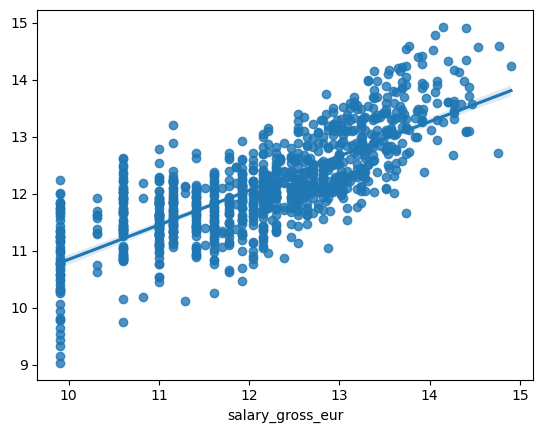

In [40]:
sns.regplot(y_test,predictions)

In [41]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:       salary_gross_eur   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     40.65
Date:                Wed, 28 Dec 2022   Prob (F-statistic):          6.23e-244
Time:                        11:42:37   Log-Likelihood:                -1606.3
No. Observations:                1518   AIC:                             3319.
Df Residuals:                    1465   BIC:                             3601.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.24

C:\Users\Ramya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='salary_gross_eur'>

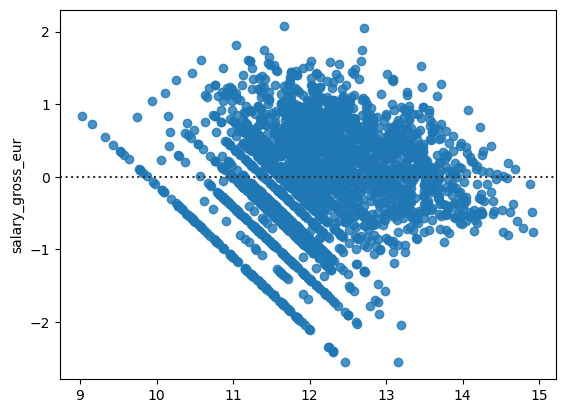

In [42]:
sns.residplot(model.predict(X), Y)

#### Model Export

In [ ]:
import pickle
pickle.dump(model, open('model_it.pkl','wb')) 